In [3]:
# Scrape contracts
from utils.scrape import HTMLTableParser, PlayerContractParser, rename_player, get_date
import pandas as pd

# Visualize things
import seaborn as sns
import matplotlib.pyplot as plt

# Scrape Initial Dataset

We first need to get a list of all currently active, or recently active players. 

This will include things like their name, age, handedness, position, etc. Things that don't change from year to year. 

We'll want this data set to go back a few years to get a reasaonbly large sample of players.

Once we make it and get unique player names, give the players unique IDs that are easier to work with.

In [3]:
year = 2020
url = 'https://www.capfriendly.com/browse/active/'+str(year)+'/signing-date/all/all/all/asc&display=birthday,caphit-percent,length,type,signing-age,signing-date&hide=salary,skater-stats,goalie-stats'
add_on = '&p='
hp = HTMLTableParser()
cap_friendly_df = hp.parse_url(url)[0][1] # Grabbing the table from the tuple

# Do the rest of the pages (will break when the page no longer exists) 
page = 2
while True:
    try:
        df_new = hp.parse_url(url+add_on+str(page))[0][1]
        cap_friendly_df = cap_friendly_df.append(df_new, ignore_index=True)
        page+=1
    except:
        break
cap_friendly_df.PLAYER = cap_friendly_df.PLAYER.apply(rename_player)

In [23]:
# Get active players in previous years
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
for year in years:
    url = 'https://www.capfriendly.com/browse/active/'+str(year)+'/signing-date/all/all/all/asc&display=birthday,caphit-percent,length,type,signing-age,signing-date&hide=salary,skater-stats,goalie-stats'
    cap_friendly_df_2 = hp.parse_url(url)[0][1]
    page = 2
    while True:
        try:
            df_new = hp.parse_url(url+add_on+str(page))[0][1]
            cap_friendly_df_2 = cap_friendly_df_2.append(df_new, ignore_index=True)
            page+=1
        except:
            break
    cap_friendly_df_2.PLAYER = cap_friendly_df_2.PLAYER.apply(rename_player)

    for player_name in cap_friendly_df_2.PLAYER.values:
        if player_name in cap_friendly_df.PLAYER.values:
            pass
        else:
            cap_friendly_df = cap_friendly_df.append(cap_friendly_df_2[cap_friendly_df_2['PLAYER']==player_name], ignore_index=True)

In [27]:
# custom stuff to get the actual rows I want
cap_friendly_df = cap_friendly_df[cap_friendly_df['POS']!='G']
cap_friendly_df['center'] = cap_friendly_df.POS.apply(lambda x: 1 if 'C' in x else 0)
cap_friendly_df['left_wing'] = cap_friendly_df.POS.apply(lambda x: 1 if 'LW' in x else 0)
cap_friendly_df['right_wing'] = cap_friendly_df.POS.apply(lambda x: 1 if 'RW' in x else 0)
cap_friendly_df['defense'] = cap_friendly_df.POS.apply(lambda x: 1 if 'D' in x else 0)
cap_friendly_df['HANDED'] = cap_friendly_df.HANDED.apply(lambda x: 1 if x=='Right' else 0)
cap_friendly_df['DATE OF BIRTH'] = cap_friendly_df['DATE OF BIRTH'].apply(get_date)
cap_friendly_df['cap_hit_pct'] = cap_friendly_df['CAP HIT %'].apply(lambda x: float(x[:-1])/100)
cap_friendly_df.head()

,PLAYER,TEAM,AGE,DATE OF BIRTH,POS,HANDED,TYPE,SIGNING DATE,SIGNING AGE,CLAUSE,LENGTH,EXPIRY,CAP HIT,CAP HIT %,center,left_wing,right_wing,defense,cap_hit_pct
0,ALEX.OVECHKIN,WSH,33,"(17, 9, 1985)","LW, RW",1,Standard (1-way),"Jan 10, 2008",22.0,M-NTC,13.0,UFA,"$9,538,462",16.8%,0,1,1,0,0.168
1,HENRIK.ZETTERBERG,DET,38,"(9, 10, 1980)",C,0,Standard (1-way),"Jan 28, 2009",28.0,,12.0,UFA,"$6,083,333",10.7%,1,0,0,0,0.107
2,JOHAN.FRANZEN,DET,39,"(23, 12, 1979)","RW, LW",0,Standard (1-way),"Apr 11, 2009",29.0,,11.0,UFA,"$3,954,545",7.0%,0,1,1,0,0.070
3,MARIAN.HOSSA,ARI,40,"(12, 1, 1979)",RW,0,Standard (1-way),"Jul 1, 2009",30.0,NMC,12.0,UFA,"$5,275,000",9.3%,0,0,1,0,0.093
5,DUNCAN.KEITH,CHI,35,"(16, 7, 1983)",D,0,Standard (1-way),"Dec 3, 2009",26.0,NMC,13.0,UFA,"$5,538,462",9.8%,0,0,0,1,0.098


In [28]:
# Rename columns so they are more friendly
new_columns = list(cap_friendly_df.columns)
for i,col in enumerate(new_columns):
    new_columns[i] = col.lower().replace(' ','_')
cap_friendly_df.columns = new_columns
cap_friendly_df.head()

,player,team,age,date_of_birth,pos,handed,type,signing_date,signing_age,clause,length,expiry,cap_hit,cap_hit_%,center,left_wing,right_wing,defense,cap_hit_pct
0,ALEX.OVECHKIN,WSH,33,"(17, 9, 1985)","LW, RW",1,Standard (1-way),"Jan 10, 2008",22.0,M-NTC,13.0,UFA,"$9,538,462",16.8%,0,1,1,0,0.168
1,HENRIK.ZETTERBERG,DET,38,"(9, 10, 1980)",C,0,Standard (1-way),"Jan 28, 2009",28.0,,12.0,UFA,"$6,083,333",10.7%,1,0,0,0,0.107
2,JOHAN.FRANZEN,DET,39,"(23, 12, 1979)","RW, LW",0,Standard (1-way),"Apr 11, 2009",29.0,,11.0,UFA,"$3,954,545",7.0%,0,1,1,0,0.070
3,MARIAN.HOSSA,ARI,40,"(12, 1, 1979)",RW,0,Standard (1-way),"Jul 1, 2009",30.0,NMC,12.0,UFA,"$5,275,000",9.3%,0,0,1,0,0.093
5,DUNCAN.KEITH,CHI,35,"(16, 7, 1983)",D,0,Standard (1-way),"Dec 3, 2009",26.0,NMC,13.0,UFA,"$5,538,462",9.8%,0,0,0,1,0.098


In [30]:
cap_friendly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2521 entries, 0 to 1518
Data columns (total 19 columns):
player           2521 non-null object
team             2521 non-null object
age              2521 non-null object
date_of_birth    2521 non-null object
pos              2521 non-null object
handed           2521 non-null int64
type             2521 non-null object
signing_date     2521 non-null object
signing_age      2521 non-null float64
clause           2521 non-null object
length           2521 non-null float64
expiry           2521 non-null object
cap_hit          2521 non-null object
cap_hit_%        2521 non-null object
center           2521 non-null int64
left_wing        2521 non-null int64
right_wing       2521 non-null int64
defense          2521 non-null int64
cap_hit_pct      2521 non-null float64
dtypes: float64(3), int64(5), object(11)
memory usage: 393.9+ KB


In [31]:
cap_friendly_df.describe()

,handed,signing_age,length,center,left_wing,right_wing,defense,cap_hit_pct
count,2521.000000,2521.000000,2521.00000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000
mean,0.376041,23.021420,2.88338,0.323681,0.285998,0.263388,0.359381,0.023840
std,0.484487,4.164992,1.56115,0.467973,0.451978,0.440558,0.479914,0.027743
min,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.010000
50%,0.000000,22.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.012000
75%,1.000000,25.000000,3.00000,1.000000,1.000000,1.000000,1.000000,0.017000
max,1.000000,42.000000,14.00000,1.000000,1.000000,1.000000,1.000000,0.279000


In [32]:
cap_friendly_df.to_csv('./data/cap_friendly_stats.csv',index=False)

In [33]:
# player data only DF
columns = ['player', 'team', 'date_of_birth', 'age', 'handed', 'center', 'left_wing', 'right_wing', 'defense']
player_df = cap_friendly_df[columns]
player_df.head(20)

,player,team,date_of_birth,age,handed,center,left_wing,right_wing,defense
0,ALEX.OVECHKIN,WSH,"(17, 9, 1985)",33,1,0,1,1,0
1,HENRIK.ZETTERBERG,DET,"(9, 10, 1980)",38,0,1,0,0,0
2,JOHAN.FRANZEN,DET,"(23, 12, 1979)",39,0,0,1,1,0
3,MARIAN.HOSSA,ARI,"(12, 1, 1979)",40,0,0,0,1,0
5,DUNCAN.KEITH,CHI,"(16, 7, 1983)",35,0,0,0,0,1
6,NICKLAS.BACKSTROM,WSH,"(23, 11, 1987)",31,0,1,0,0,0
7,JEFF.CARTER,LAK,"(1, 1, 1985)",34,1,1,0,1,0
9,JORDAN.STAAL,CAR,"(10, 9, 1988)",30,0,1,1,0,0
10,SIDNEY.CROSBY,PIT,"(7, 8, 1987)",31,0,1,0,0,0
11,ZACH.PARISE,MIN,"(28, 7, 1984)",34,0,0,1,0,0


In [48]:
# make sure player list is unique and give them identifiers for future reference.
unique_list = []
indx = []
for i,player in enumerate(player_df.player):
    if player in unique_list:
        print(player)
    else:
        unique_list.append(player)
        indx.append(i)
player_df = player_df.loc[indx,:]
player_df['player_id']=range(len(player_df))
player_df.reset_index(inplace=True)

JOSH.ANDERSON
ALEXANDRE.PICARD
CONOR.ALLEN
KAEL.MOUILLIERAT
JESPER.PETTERSSON


In [49]:
player_df.to_csv('./data/player_stats.csv', index=False)

In [36]:
# Check number of unique players we found. 
player_df.player.nunique()

,player,team,date_of_birth,age,handed,center,left_wing,right_wing,defense
369,SEBASTIAN.AHO,NYI,"(17, 2, 1996)",23,0,0,0,0,1


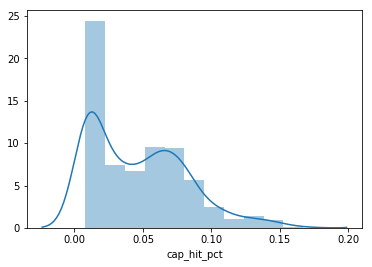

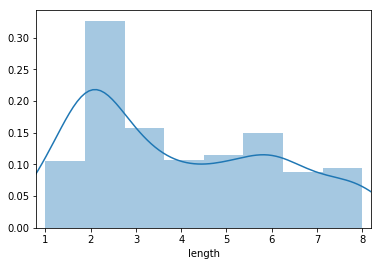

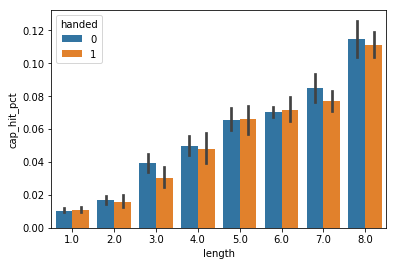

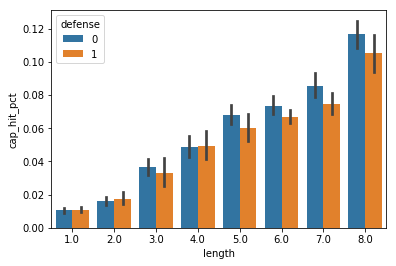

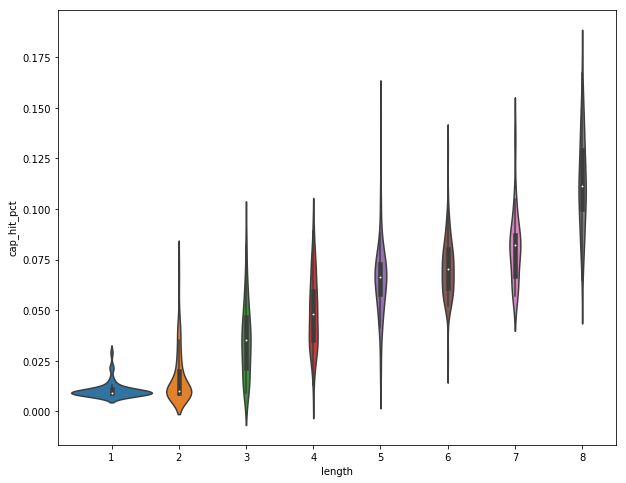

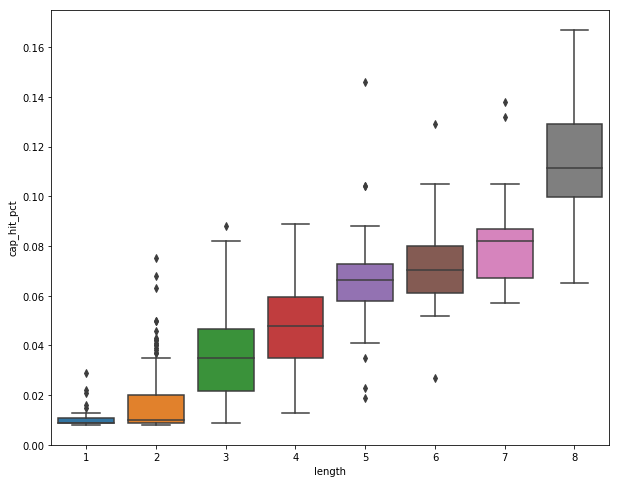

In [12]:
# For interest, look at a few of the possible correlations we might be interested in later. 
# Nothing fancy, do more visualizations after fully processing the data. 
sns.distplot(cap_friendly_df.cap_hit_pct)
plt.show()

ax = plt.subplot()
sns.distplot(cap_friendly_df.length)
ax.set_xticks(range(1,9))
ax.set_xticklabels(range(1,9))
plt.xlim([0.8,8.2])
plt.show()

sns.barplot(data=cap_friendly_df, x='length',y='cap_hit_pct', hue='handed')
plt.show()

sns.barplot(data=cap_friendly_df, x='length',y='cap_hit_pct', hue='defense')
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(data=cap_friendly_df, x='length',y='cap_hit_pct', width=1.2)
ax.set_xticks(range(0,8))
ax.set_xticklabels(range(1,9))
plt.xlim([-0.8,7.5])
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=cap_friendly_df, x='length',y='cap_hit_pct')
ax.set_xticks(range(0,8))
ax.set_xticklabels(range(1,9))
plt.xlim([-0.5,7.5])
plt.show()

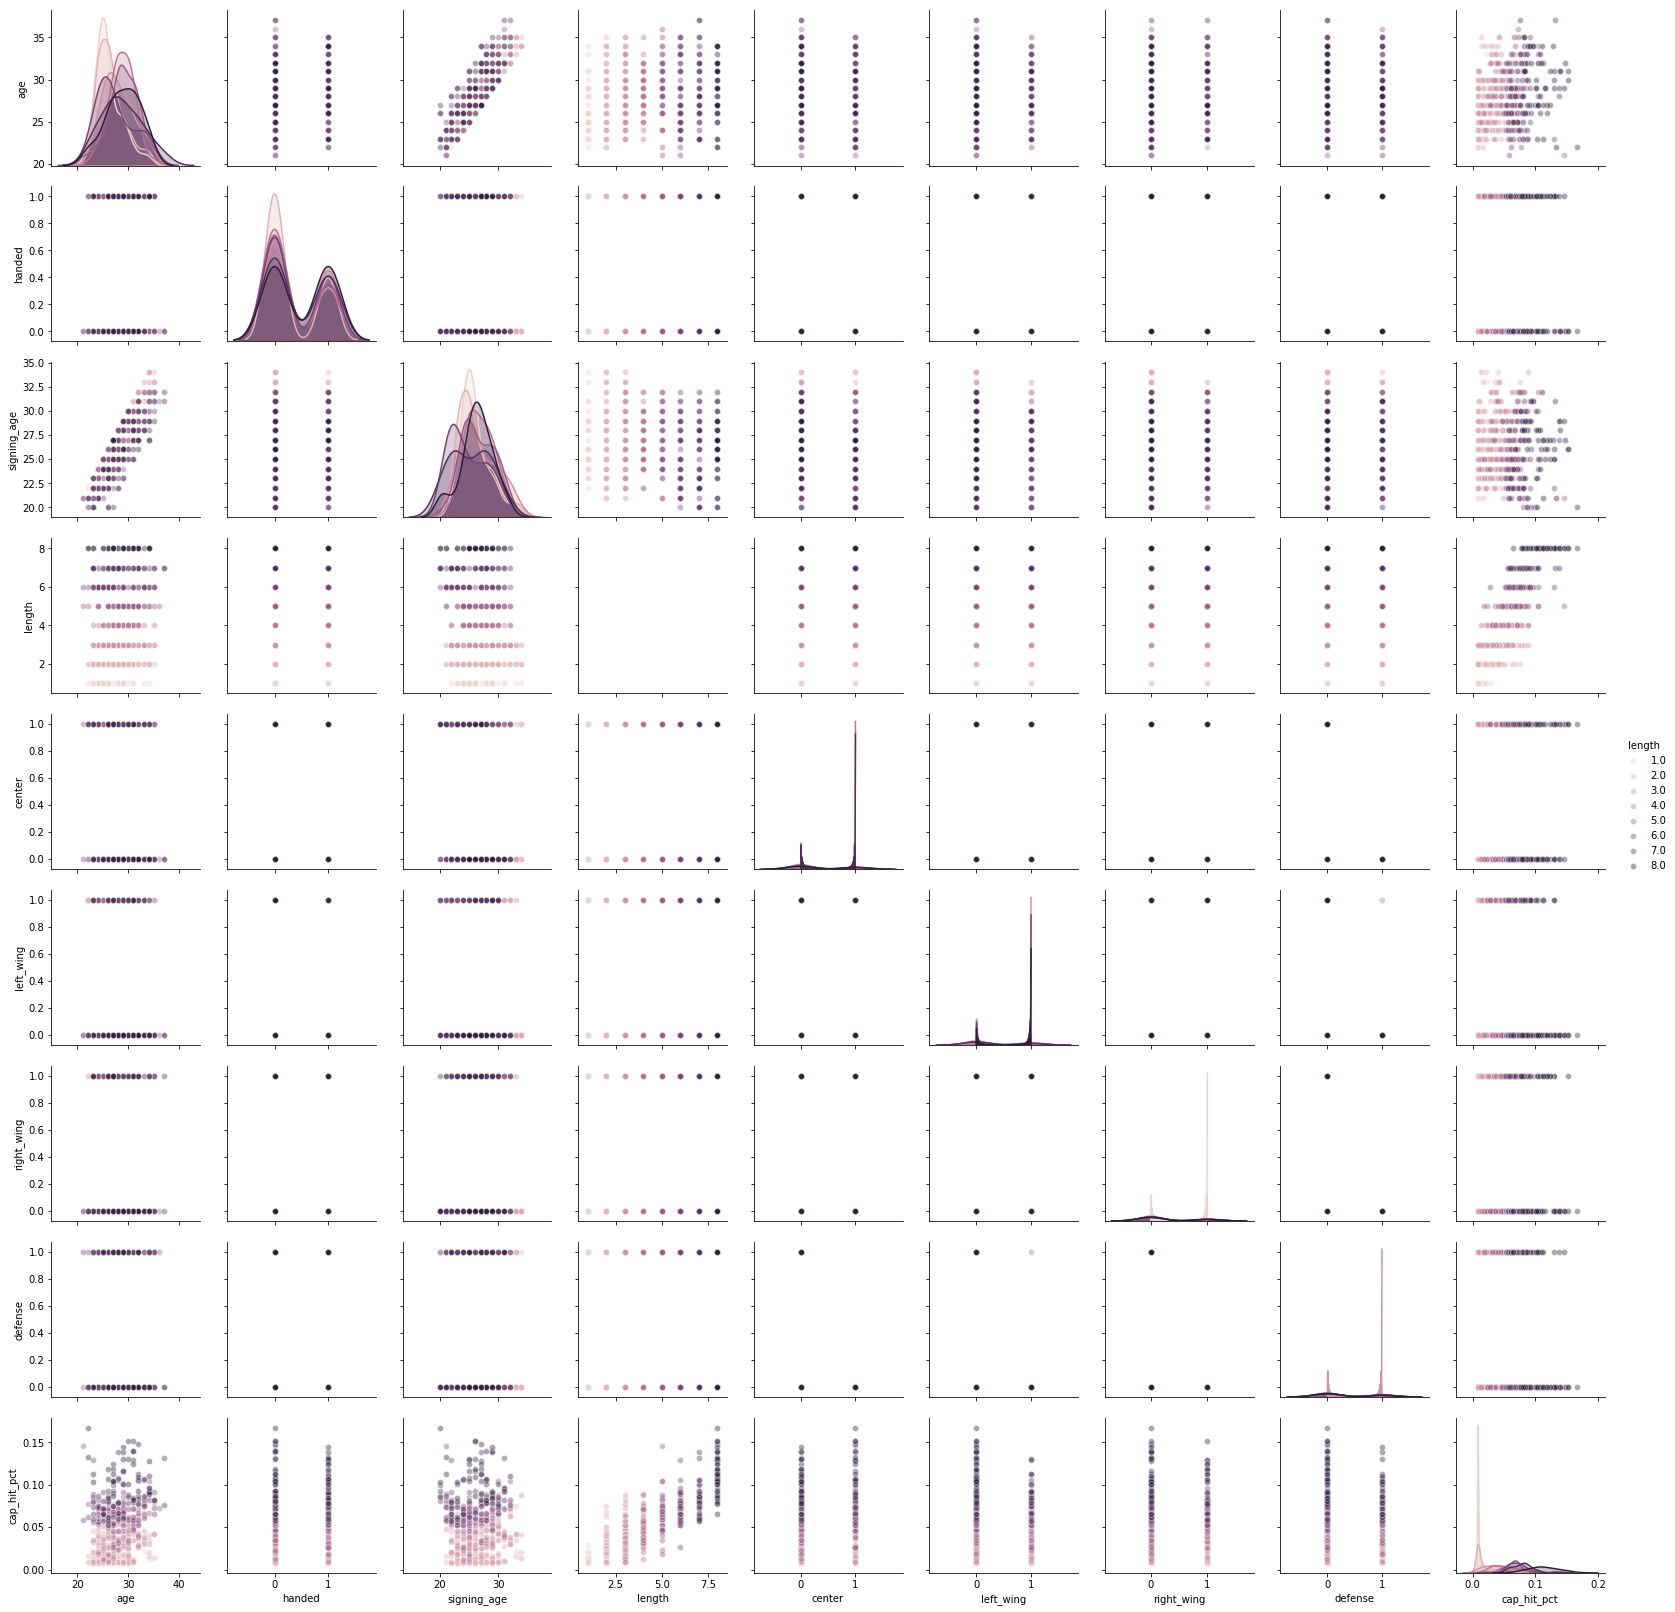

In [18]:
cols = ['age', 'handed', 'signing_age', 'length', 'center', 'left_wing', 'right_wing', 'defense', 'cap_hit_pct']
sns.pairplot(
             cap_friendly_df, 
             x_vars= cols, 
             y_vars=cols, 
             hue='length', 
             palette=sns.cubehelix_palette(8), 
             plot_kws={'alpha':0.4}
            )
plt.show()

# Create Contracts Dataset

Once we have a list of player names and their 'fixed' stats, let's get their contract info. 

This will include things like length of contract, percent of the cap, what their status was when signing, etc. 

Also tack on that unique player id for ease of use in the future. 

In [4]:
player_df = pd.read_csv('./data/player_stats.csv')

In [5]:
# Create humongous contracts df
contract_df = pd.DataFrame(columns=[
    'name',
    'contract_type',
    'length',
    'cap_hit_pct',
    'signing_status', 
    'signing_age',
    'signing_date'
    ])

# Go through all the players in our list and grab all of their past contracts
# Some don't show up. Mostly a formatting issue with their names. 
# It's small enough subset of the data to not worry too much about it. 
for player in player_df.player.values:
    player_list = player.split('.')
    player_formatted = ''
    for name in player_list:
        player_formatted += name.capitalize() + ' '
    player_formatted = player_formatted[:-1]
    player_parser = PlayerContractParser(player_formatted)
    single_df = player_parser.contracts_df
    try:
        single_df['name'] = player
        contract_df = contract_df.append(single_df, ignore_index=True)
    except:
        pass

C:\Users\linds\Anaconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Player nathan-horton, Sign Date Unknown
Player Travis St  Denis Not Found.
Player eric-staal, Sign Date Unknown
Player tj-fast, Sign Date Unknown
Player Martin St  Louis Not Found.
Player shane-doan, Sign Date Unknown
Player thomas-vanek, Sign Date Unknown
Player dustin-penner, Sign Date Unknown
Player john-michael-liles, Sign Date Unknown
Player curtis-glencross, Sign Date Unknown
Player dennis-wideman, Sign Date Unknown
Player joffrey-lupul, Sign Date Unknown
Player marc-savard, Sign Date Unknown
Player alexander-semin, Sign Date Unknown
Player paul-martin, Sign Date Unknown
Player trevor-smith, Sign Date Unknown
Player cam-janssen, Sign Date Unknown
Player tomas-fleischmann, Sign Date Unknown
Player james-wisniewski, Sign Date Unknown
Player Michael St  Croix Not Found.
Player Jean-sebastien Dea Not Found.
Player Jean Philippe Cote Not Found.


In [6]:
contract_df = contract_df[['name', 'signing_date', 'signing_age','signing_status','contract_type','length','cap_hit_pct']]
contract_df

,name,signing_date,signing_age,signing_status,contract_type,length,cap_hit_pct
0,ALEX.OVECHKIN,"(31, 8, 2005)",19,0,ENTRY-LEVEL CONTRACT,3,0.0252
1,ALEX.OVECHKIN,"(10, 1, 2008)",22,0,STANDARD CONTRACT,13,0.1682
2,HENRIK.ZETTERBERG,"(7, 9, 2005)",24,1,STANDARD CONTRACT,4,0.0679
3,HENRIK.ZETTERBERG,"(28, 1, 2009)",28,1,STANDARD CONTRACT,12,0.1073
4,JOHAN.FRANZEN,"(4, 8, 2005)",25,0,STANDARD CONTRACT,1,0.0154
5,JOHAN.FRANZEN,"(25, 8, 2006)",26,0,STANDARD CONTRACT,3,0.0214
6,JOHAN.FRANZEN,"(11, 4, 2009)",29,1,STANDARD CONTRACT,11,0.0697
7,MARIAN.HOSSA,"(23, 8, 2005)",26,1,STANDARD CONTRACT,3,0.1538
8,MARIAN.HOSSA,"(2, 7, 2008)",29,1,STANDARD CONTRACT,1,0.1314
9,MARIAN.HOSSA,"(1, 7, 2009)",30,1,STANDARD CONTRACT,12,0.0929


In [7]:
# add the unique player ids to this so that we don't need to match on player names.
# there is very little overlap, so matching on names could work
# but it's messy and different sites use different conventions, so work in ids early on to avoid headache later
contract_df['player_id']=-1
for i,player in enumerate(player_df.player.values):
    player_id = player_df.loc[i,'player_id']
    contract_df.loc[contract_df['name']==player,'player_id']=player_id

In [8]:
contract_df.head(20)

,name,signing_date,signing_age,signing_status,contract_type,length,cap_hit_pct,player_id
0,ALEX.OVECHKIN,"(31, 8, 2005)",19,0,ENTRY-LEVEL CONTRACT,3,0.0252,0
1,ALEX.OVECHKIN,"(10, 1, 2008)",22,0,STANDARD CONTRACT,13,0.1682,0
2,HENRIK.ZETTERBERG,"(7, 9, 2005)",24,1,STANDARD CONTRACT,4,0.0679,1
3,HENRIK.ZETTERBERG,"(28, 1, 2009)",28,1,STANDARD CONTRACT,12,0.1073,1
4,JOHAN.FRANZEN,"(4, 8, 2005)",25,0,STANDARD CONTRACT,1,0.0154,2
5,JOHAN.FRANZEN,"(25, 8, 2006)",26,0,STANDARD CONTRACT,3,0.0214,2
6,JOHAN.FRANZEN,"(11, 4, 2009)",29,1,STANDARD CONTRACT,11,0.0697,2
7,MARIAN.HOSSA,"(23, 8, 2005)",26,1,STANDARD CONTRACT,3,0.1538,3
8,MARIAN.HOSSA,"(2, 7, 2008)",29,1,STANDARD CONTRACT,1,0.1314,3
9,MARIAN.HOSSA,"(1, 7, 2009)",30,1,STANDARD CONTRACT,12,0.0929,3


In [9]:
# save contract info for later use.
contract_df.to_csv('data/contract_stats.csv',index=False)

In [10]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6646 entries, 0 to 6645
Data columns (total 8 columns):
name              6646 non-null object
signing_date      6646 non-null object
signing_age       6646 non-null object
signing_status    6646 non-null object
contract_type     6646 non-null object
length            6646 non-null object
cap_hit_pct       6646 non-null float64
player_id         6646 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 415.5+ KB


In [11]:
contract_df.describe()

,cap_hit_pct,player_id
count,6646.000000,6646.000000
mean,0.022379,1242.030996
std,0.024823,633.208064
min,0.000000,0.000000
25%,0.009500,751.250000
50%,0.011800,1308.000000
75%,0.020500,1696.000000
max,0.279100,2515.000000


ValueError: color kwarg must have one color per data set. 6646 data sets and 1 colors were provided

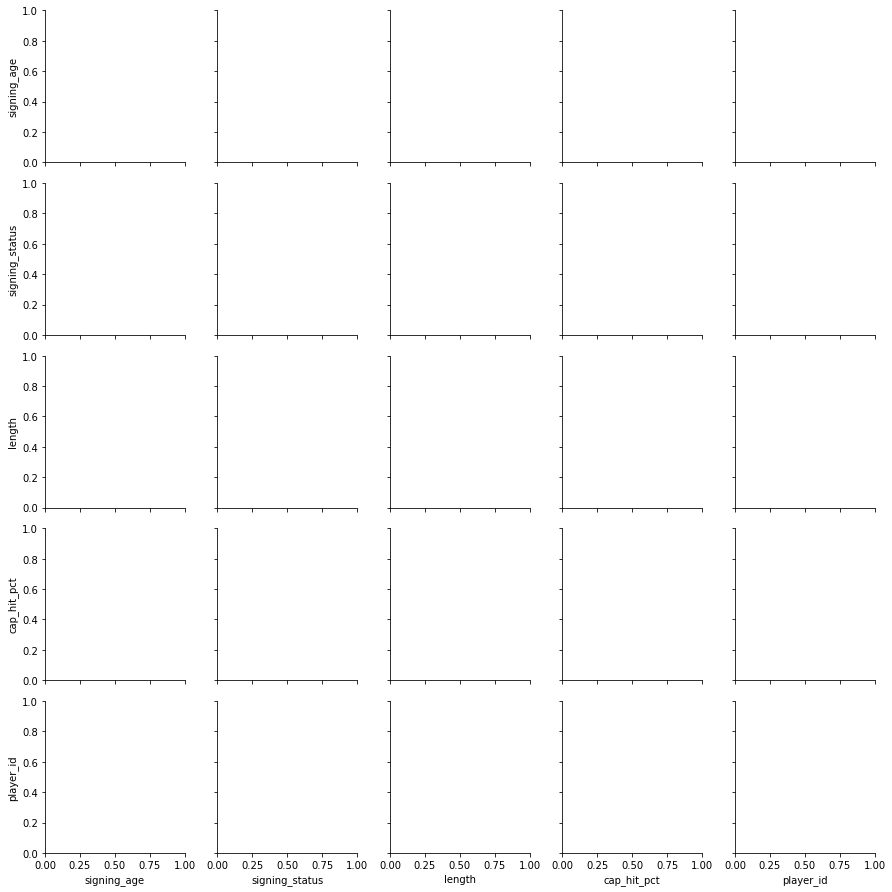

In [12]:
# agains some very basic visuals. 
contract_df_reduced = contract_df[contract_df.contract_type=='STANDARD CONTRACT']
sns.pairplot(contract_df, plot_kws = {'alpha':0.4})
plt.show()


cols_hist = ['signing_age', 'length', 'cap_hit_pct']
cols_bar = ['signing_status', 'contract_type']
for col in cols_hist:
    contract_df.hist(col)
    plt.show()
    
sns.barplot(data=contract_df_reduced,x='length',y='cap_hit_pct',hue='signing_status')
plt.show()

sns.barplot(data=contract_df_reduced,x='signing_age',y='cap_hit_pct',hue='signing_status')
plt.show()

sns.barplot(data=contract_df_reduced,x='length',y='cap_hit_pct',hue='contract_type')
plt.show()

sns.barplot(data=contract_df_reduced,x='signing_age',y='cap_hit_pct',hue='contract_type')
plt.show()

sns.barplot(data=contract_df_reduced, x='signing_age', y='length')
plt.show()

sns.barplot(data=contract_df_reduced,x='signing_age',y='length',hue='signing_status')
plt.show()

sns.barplot(data=contract_df_reduced,x='signing_age',y='length',hue='contract_type')
plt.show()
    